# Assignment 2: Sensitivity Analysis with PRCCs via LHS
#### Moritz Kick, Rami El Immam, Maximilian Nowak

In [1]:
# Import modules from source
import os, sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib  3.6.2
numpy       1.23.5
sinfo       0.3.4
-----
IPython             8.10.0
jupyter_client      7.4.9
jupyter_core        5.2.0
jupyterlab          3.5.3
notebook            6.5.4
-----
Python 3.11.0 (main, Mar  1 2023, 18:26:19) [GCC 11.2.0]
Linux-5.10.16.3-microsoft-standard-WSL2-x86_64-with-glibc2.31
8 logical CPU cores, x86_64
-----
Session information updated at 2023-05-27 00:11


# Implement the SEIR-Model from Assignment 1

In [2]:
from assignment1.seir import seirc_model, G1, G2

beta = 14/9  # infection rate
alpha = 7/3  # incubation rate
gamma = 7/9  # recovery rate
i0 = 1000  # initial number of infected individuals

# Define initial conditions
N = 80e6
S0 = N - i0
E0 = 0
I0 = i0
R0 = 0
C0 = I0
y0 = [S0, E0, I0, R0, C0]

### 1. Implement the LHS method for $n$-dimensional uniformly distributed random vectors.

In [3]:
from assignment2.lhs import latin_hypercube_uniform

pass

### 2. Verify your implementation.

(20, 2)


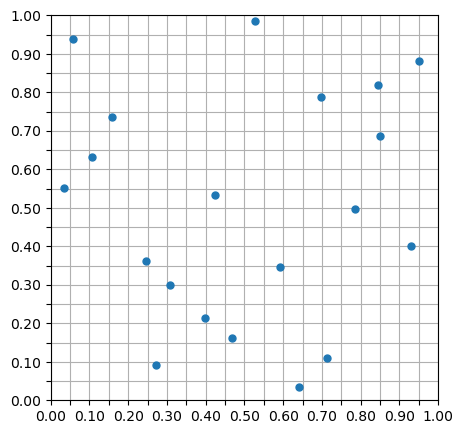

In [4]:
samples = latin_hypercube_uniform(2, 20)
print(samples.shape)

fig = plt.figure(figsize=(5,5))
ax = fig.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xticks(np.arange(0, 1.01, 0.05))
ax.set_yticks(np.arange(0, 1.01, 0.05))
ax.set_xticklabels([x if not i%2 else "" for i, x in enumerate(ax.get_xticklabels())])
ax.set_yticklabels([y if not i%2 else "" for i, y in enumerate(ax.get_yticklabels())])
plt.rc('grid', linestyle="--", color='lightgrey')
plt.grid()

plt.plot(samples[:, 0], samples[:, 1], ".", markersize="10")
plt.show()

In [5]:
# as proof check for duplicate values
u_col, c_col = np.unique(samples[:, 0], return_counts=True)
print(u_col[c_col > 1])

u_row, c_row = np.unique(samples[:, 1], return_counts=True)
print(u_row[c_row > 1])

[]
[]


### 3. Implement the computation of PCCs (not $\mathrm{P} R \mathrm{CCs}$ )

In [6]:
from assignment2.prcc import partial_corrcoef, prcc

pass

### 4. Verify the implementation of PCC and PRCC

In [14]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate Latin hypercube samples
n_samples = 1000
dim = 2

# Generate random samples
X = latin_hypercube_uniform(dim, n_samples)

# Define the functions to be tested
functions = {
    "Y = X1 + X2": lambda X: X[:, 0] + X[:, 1],
    "Y = X1 + X2^4": lambda X: X[:, 0] + X[:, 1]**4,
    "Y = X1 + cot(pi * X2)": lambda X: X[:, 0] + 1/np.tan(np.pi * X[:, 1])
}

# Test each function
for name, func in functions.items():
    y = func(X)
    pcc = partial_corrcoef(X, y)
    prcc_val = prcc(X, y)
    print(f"{name} PCC: {pcc}, PRCC: {prcc_val}")

Y = X1 + X2 PCC: [1. 1.], PRCC: [0.98104648 0.9807147 ]
Y = X1 + X2^4 PCC: [0.90819006 0.86604775], PRCC: [0.91737312 0.85808704]
Y = X1 + cot(pi * X2) PCC: [-0.02842039 -0.15912888], PRCC: [ 0.81538638 -0.99412805]


In [7]:
X1 = latin_hypercube_uniform(1, 1000, 0, 1)
X2 = latin_hypercube_uniform(1, 1000, 0, 1)

y = 4*X1
print(partial_corrcoef(X1, y))

y = X1**4
print(partial_corrcoef(X1, y))

y = X1 + X2
print(partial_corrcoef(np.c_[X1, X2], y))

y = X1 + X2**4
print(partial_corrcoef(np.c_[X1, X2], y))

y = X1 + np.tan(X2**(4))**(-1)
print(partial_corrcoef(np.c_[X1, X2], y))

[[1.]]
[[0.86603145]]
[[1. 1.]]
[[0.90770241 0.86584273]]
[[-0.02315005 -0.0556767 ]]


In [8]:
X1 = latin_hypercube_uniform(1, 1000, 0, 1)
X2 = latin_hypercube_uniform(1, 1000, 0, 1)

y = X1 + X2
print(prcc(np.c_[X1, X2], y))

y = X1 + X2**4
print(prcc(np.c_[X1, X2], y))

y = X1 + np.tan(X2**(4))**(-1)
print(prcc(np.c_[X1, X2], y))

[[0.97750598 0.97729015]]
[[0.92241426 0.85943466]]
[[ 0.57082174 -0.99892246]]


### 6. Construct the parameter domain $\mathcal{X}$.

In [9]:
beta_range = [1, 3]  # average number of contacts per week
alpha_range = [2, 14]  # mean latency period in days
gamma_range = [7, 14]  # mean recovery period in days
i0_range = [500, 2500]  # initial number of infected individuals

param_domain = np.array([beta_range, alpha_range, gamma_range, i0_range])
print(param_domain)

[[   1    3]
 [   2   14]
 [   7   14]
 [ 500 2500]]


### 7. Estimate the PRCCs between $Y_{\ell}=\mathcal{G}_{\ell}(\boldsymbol{X}), \ell=1,2$, and the input parameters $\boldsymbol{X} \sim \mathcal{U}(\mathcal{X})$ using $N=1,000$ LHS samples.

In [10]:
N_samples = 1000  # Number of LHS samples

# simulation time
T = 60
t = np.linspace(0, T, T+1)

y0 = S0, E0, I0, R0, C0

lhs_samples = latin_hypercube_uniform(4, N_samples, low=param_domain[:, 0], high=param_domain[:, 1])
print(lhs_samples.shape)

# Run the SEIRC model for each set of LHS samples
results_g1 = []
results_g2 = []

for beta, alpha, gamma, N in lhs_samples:
    sol = seirc_model((beta, alpha, gamma, N)).solve(t, y0)
    results_g1.append(G1(sol[:, 4]))  # store the cumulative number of cases at the end of the simulation
    results_g2.append(G2(sol[:, 2], t))  # store t at the max value of I

results_g1 = np.array(results_g1)
results_g2 = np.array(results_g2)

# Compute PRCCs
prcc_g1 = prcc(lhs_samples, results_g1)
prcc_g2 = prcc(lhs_samples, results_g2)

(1000, 4)


/home/mnowak/miniconda3/envs/uq/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


### Display the PRCCs with a bar plot.

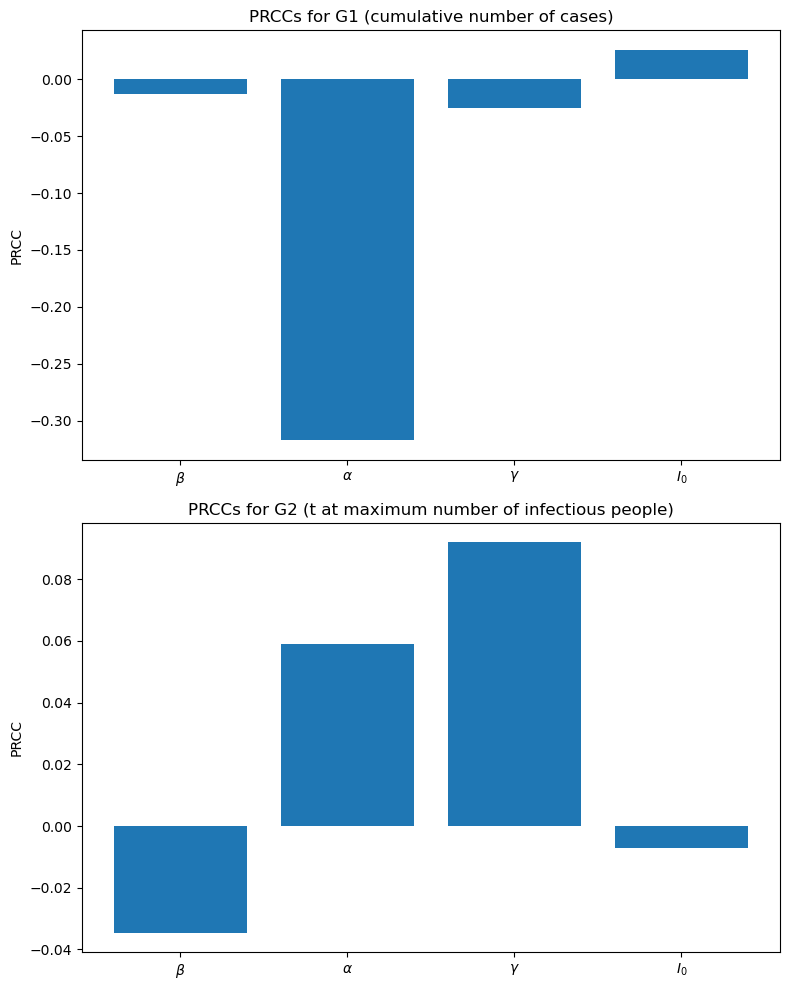

In [11]:
labels = [r'$\beta$', r'$\alpha$', r'$\gamma$', r'$I_0$']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.bar(labels, prcc_g1)
ax1.set_ylabel('PRCC')
ax1.set_title('PRCCs for G1 (cumulative number of cases)')

ax2.bar(labels, prcc_g2)
ax2.set_ylabel('PRCC')
ax2.set_title('PRCCs for G2 (t at maximum number of infectious people)')

plt.tight_layout()
plt.show()
